<a href="https://colab.research.google.com/github/syedshahlal/Understanding_Computer_Vision/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

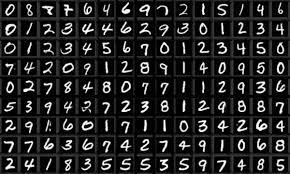

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full) , (X_test, y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full[0]

5

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_test.shape

(10000,)

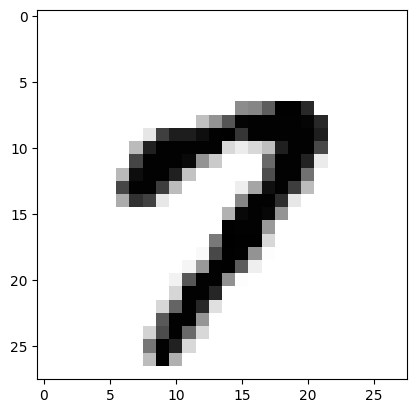

In [8]:
plt.imshow(X_train_full[15], cmap='binary')

<Axes: >

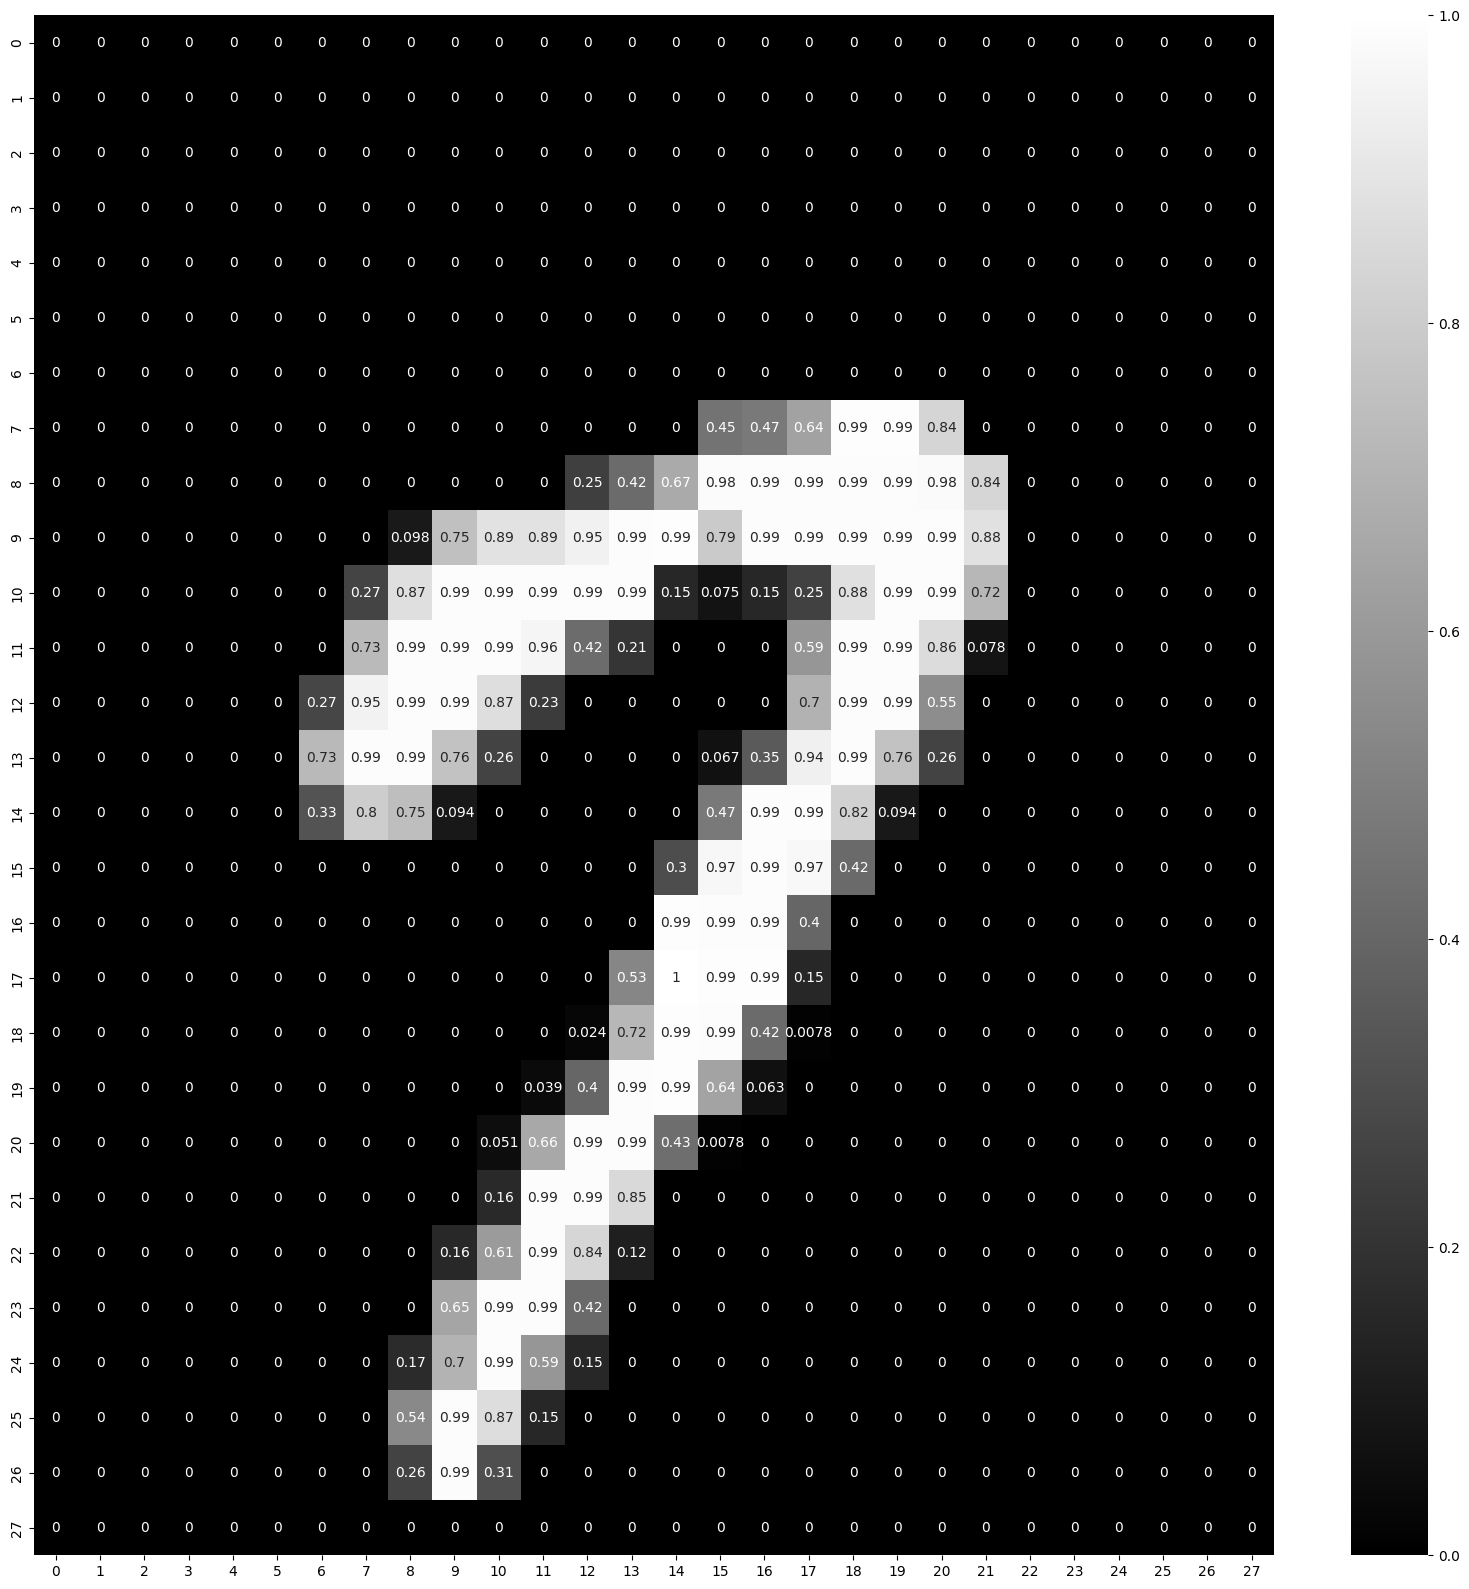

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap((X_train_full[15])/255, annot=True, cmap='gray')

In [10]:
1e+02

100.0

In [11]:
X_train_full[5000:].shape

(55000, 28, 28)

In [12]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255

In [13]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
X_test=X_test/255

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
CLASSES=len(np.unique(y_train))
CLASSES

10

In [17]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28),name='inputLayer'),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer" )

]

In [18]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "ADAM"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics= METRICS)

In [21]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    validation_data=VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 13s 4ms/step - loss: 0.2143 - accuracy: 0.9360 - val_loss: 0.1107 - val_accuracy: 0.9656
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0875 - accuracy: 0.9728 - val_loss: 0.0863 - val_accuracy: 0.9740
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0714 - val_accuracy: 0.9782
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.0774 - val_accuracy: 0.9782
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0328 - accuracy: 0.9887 - val_loss: 0.0853 - val_accuracy: 0.9750
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 0.0853 - val_accuracy: 0.9788
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0941 - val_accuracy

In [22]:
history=pd.DataFrame(history.history)

<function matplotlib.pyplot.show(close=None, block=None)>

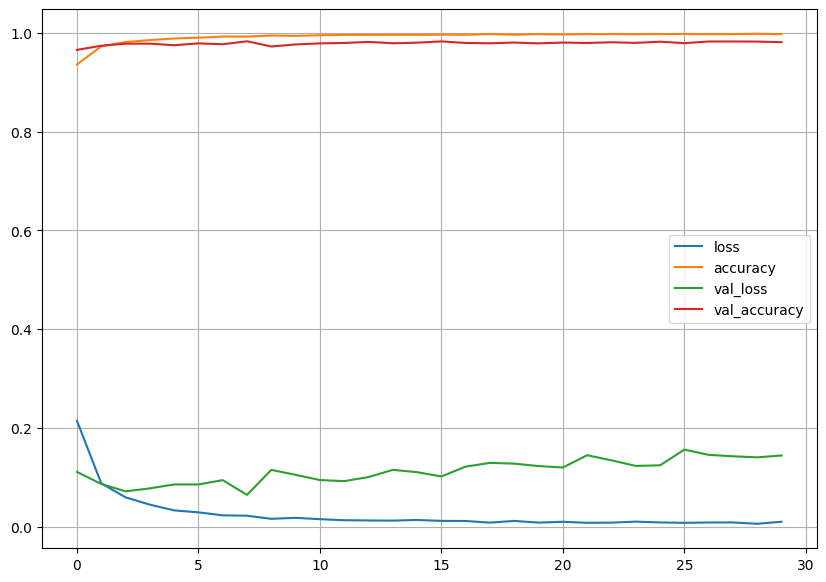

In [23]:
history.plot(figsize=(10,7))
plt.grid(True)
plt.show

In [24]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1445 - accuracy: 0.9810


[0.1445145606994629, 0.9810000061988831]

In [25]:
model_clf.save("mnist_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
X_new = X_test[:3]

y_prob =model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 78ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

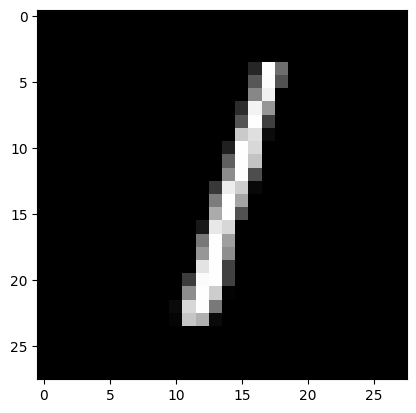

In [27]:
plt.imshow(X_new[2], cmap='gray')

In [28]:
y_pred=np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

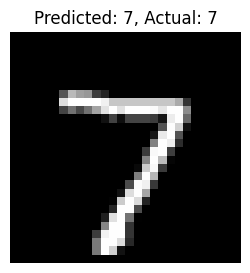

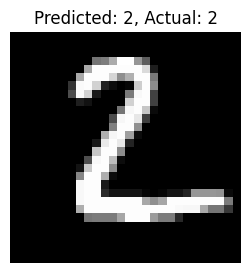

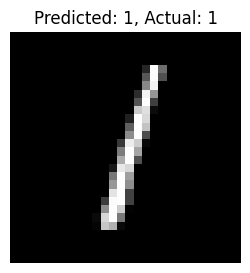

In [29]:
for img_array, pred, actual in zip(X_new, y_pred, y_test[:3]):
  plt.figure(figsize=(3,3))
  plt.imshow(img_array, cmap='gray')
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis('off')
  plt.show()


# Transfer Learning
## Classify the handwritten digits into even and odd
  * even = 1
  * odd = 0

In [30]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [31]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
for layer in pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")


inputLayer: True
hiddenLayer1: True
hiddenLayer2: True
outputLayer: True


In [33]:
for layer in pretrained_model.layers[:-1]:
  print(f"{layer.name}: {layer.trainable}")


inputLayer: True
hiddenLayer1: True
hiddenLayer2: True


In [34]:
for layer in pretrained_model.layers[:-1]:
  layer.trainable = False

In [35]:
for layer in pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")


inputLayer: False
hiddenLayer1: False
hiddenLayer2: False
outputLayer: True


In [36]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [37]:
new_model=tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(tf.keras.layers.Dense(2, activation="softmax", name="outputLayer"))

In [38]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 2)                 202       
                                                                 
Total params: 265802 (1.01 MB)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 265600 (1.01 MB)
_________________________________________________________________


In [39]:
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx] = np.where(label%2 == 0, 1, 0)
  return labels

In [40]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [41]:
np.unique(y_train_bin)

array([0, 1])

In [42]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "ADAM"
METRICS = ["accuracy"]

new_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics= METRICS)

In [43]:
EPOCHS = 10

VALIDATION = (X_valid, y_valid_bin)

history = new_model.fit(
    X_train,
    y_train_bin,
    epochs = EPOCHS,
    validation_data=VALIDATION
)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1720 - accuracy: 0.9568 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9923 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9923 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9926 - val_loss: 0.0510 - val_accuracy: 0.9864
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0529 - val_accuracy:

In [44]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy: 0.9850


[0.05020345002412796, 0.9850000143051147]

In [45]:
history

<function matplotlib.pyplot.show(close=None, block=None)>

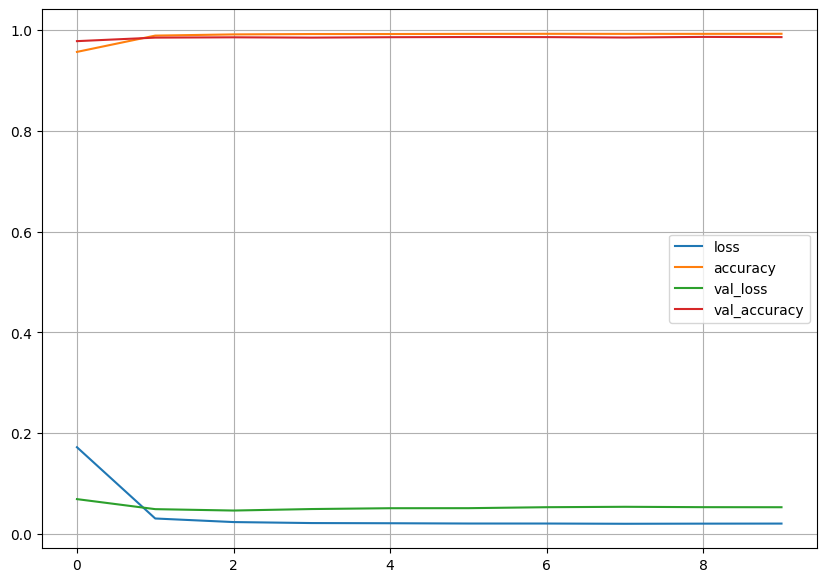

In [46]:
history = pd.DataFrame(history.history)
history.plot(figsize=(10,7))
plt.grid(True)
plt.show

In [47]:
X_new = X_test[:3]

y_prob =new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 72ms/step


array([[1.   , 0.   ],
       [0.   , 1.   ],
       [0.988, 0.012]], dtype=float32)

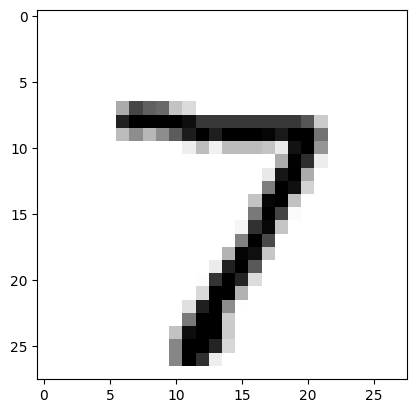

In [48]:
plt.imshow(X_new[0], cmap="binary")

In [49]:
y_pred=np.argmax(y_prob, axis=-1)
y_pred

array([0, 1, 0])

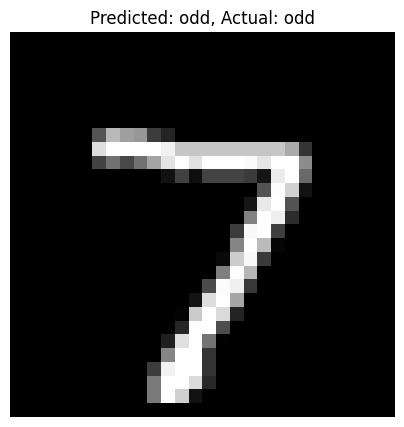

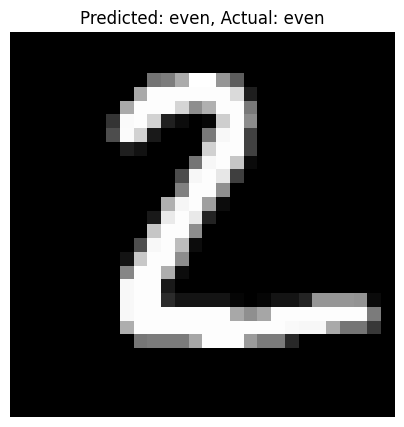

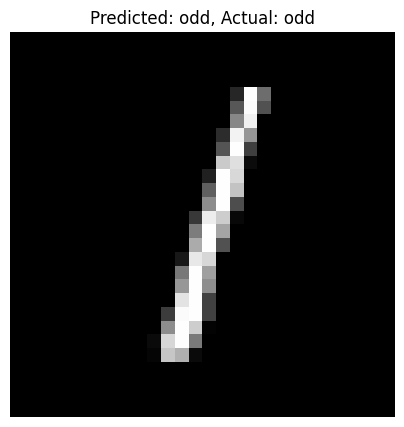

In [50]:
for img_array, pred, actual in zip(X_new, y_pred, y_test_bin[:3]):
  if pred + actual == 2:
    pred = "even"
    actual = "even"
  elif pred == 1:
    pred = "even"
  else:
    pred = "odd"
    actual = "odd"
  plt.figure(figsize=(5,5))
  plt.imshow(img_array, cmap='gray')
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis('off')
  plt.show()


# Now let's train a CNN model on this

In [51]:
X_train[0].shape

(28, 28)

In [52]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [53]:
X_train_CNN.shape, X_test_CNN.shape, X_valid_CNN.shape

((55000, 28, 28, 1), (10000, 28, 28, 1), (5000, 28, 28, 1))

In [54]:
X_train_CNN[0].shape

(28, 28, 1)

In [55]:
input_shape = (X_train_CNN[0].shape)

LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size= (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size= (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
]

In [56]:
CNN_model = tf.keras.models.Sequential(
    LAYERS
  )

In [57]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [58]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "ADAM"
METRICS = ["accuracy"]

CNN_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics= METRICS)

In [59]:
EPOCHS = 10

VALIDATION = (X_valid_CNN, y_valid)

history = CNN_model.fit(
    X_train_CNN,
    y_train,
    epochs = EPOCHS,
    validation_data=VALIDATION
)

Epoch 1/10
1719/1719 [==============================] - 13s 4ms/step - loss: 0.1703 - accuracy: 0.9485 - val_loss: 0.0635 - val_accuracy: 0.9818
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0546 - accuracy: 0.9834 - val_loss: 0.0466 - val_accuracy: 0.9858
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0389 - val_accuracy: 0.9874
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0346 - val_accuracy: 0.9898
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy

In [60]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9901


[0.034543223679065704, 0.9901000261306763]

In [61]:
CNN_model.save("CNN_model_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
pretrained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [71]:
pretrained_CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [72]:
for layer in pretrained_CNN_model.layers[:-1]:
  layer.trainable = False

In [73]:
lower_pretrained_CNN_model = pretrained_CNN_model.layers[:-1]

In [74]:
new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [79]:
new_CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [76]:
new_CNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [77]:
history = new_CNN_model.fit(
    X_train_CNN, y_train_bin, epochs=30,
    validation_data = (X_valid_CNN, y_valid_bin)
)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.9725 - val_loss: 0.0508 - val_accuracy: 0.9826
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0487 - accuracy: 0.9837 - val_loss: 0.0433 - val_accuracy: 0.9840
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.0400 - val_accuracy: 0.9862
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9870 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0364 - accuracy: 0.9876 - val_loss: 0.0358 - val_accuracy: 0.9872
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9881 - val_loss: 0.0359 - val_accuracy: 0.9878
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0330 - accuracy: 0.9887 - val_loss: 0.0347 - val_accuracy:

In [78]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)

313/313 [==============================] - 1s 3ms/step - loss: 0.0274 - accuracy: 0.9902


[0.027380812913179398, 0.9901999831199646]